# Week 3 - LeNet - MNIST - Deep Learning Lab

Author: Khushee Kapoor

Last Updated: 9/8/22

**Meta-Data** of the dataset:

The dataset contains images of handwritten digits from 0-9. The goal is to identify the digit written.

## Setting Up:

To setup, we will import the following libraries:

- NumPy: to analyze the image data
- MatPlotLib: for data visualization
- Seaborn: for data visualization
- TensorFlow: to build neural networks

In [ ]:
# importing the libraries
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import tensorflow as tf

Next, we download the dataset. Since it is available in TensorFlow, we download it directly and split into train and test sets.

In [ ]:
# downloading the data
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Next, we splice the training dataset to obtain the first image and then use the shape attribute to find its dimensions.

In [ ]:
# finding the dimensions of the image
x_train[0].shape

(28, 28)

As we can see, each image has dimensions 28x28.

Next, we divide the training and testing data by 255 to normalize them.

In [ ]:
# performing normalization
x_train = x_train/255
x_test = x_test/255

## Le-Net 5 Architecture

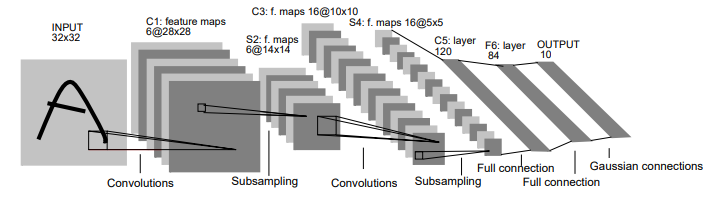

To implement the Le-Net 5 architecture for image classification, we use the Sequential API from the Tensorflow library to initialize the network.

In [ ]:
# intializing the network
model = tf.keras.Sequential()

### Layers C1-S2: Input -> Conv2D -> Pooling

The specificatons of the layers are as follows:

- Input: The dimensions of the input layer are 28x28x1 as obtained in the above cells.
- Convolution: 6 filters of size 5x5 with activation 'tanh' and 'same' padding.
- Pooling: Average Pooling of kernel 2x2 with stride 2.


In [ ]:
# input layer
model.add(tf.keras.Input((28,28,1)))

# convolution layer
model.add(tf.keras.layers.Conv2D(filters=6, kernel_size=(5,5), activation='tanh', padding='same'))

# pooling layer
model.add(tf.keras.layers.AveragePooling2D(pool_size=(2,2), strides=(2,2)))

### Layers C3-S4: Conv2D -> Pooling

The specificatons of the layers are as follows:

- Convolution: 16 filters of size 5x5 with activation 'tanh' and 'valid' padding.
- Pooling: Average Pooling of kernel 2x2 with stride 2.

In [ ]:
# convolution layer
model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(5,5), activation='tanh', padding='valid'))

# pooling layer
model.add(tf.keras.layers.AveragePooling2D(pool_size=(2,2), strides=(2,2)))

### Layers F5-F6-F7: Conv2D -> Fully Connected -> Fully Connected

The specificatons of the layers are as follows:

- Flatten: To convert convolution matrix to fully connected layer.
- Dense: 120 units with 'sigmoid' activation.
- Dense: 84 units with 'sigmoid' activation.
- Dense: 10 units with 'softmax' activation.

In [ ]:
# flattening
model.add(tf.keras.layers.Flatten())

# fully connected layer
model.add(tf.keras.layers.Dense(120, activation='sigmoid'))

# fully connected layer
model.add(tf.keras.layers.Dense(84, activation='sigmoid'))

# output layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

### Comparing and Evaluating

Next, we compile the model and set the optimizer to be 'adam', loss to be 'sparse_categorical_crossentropy' and metric to be 'accuracy'. After that, we train the model on the training data with batch size set to 32 (to optimize computation), number of epochs set to 20 (optimum value set after trial and error of various combinations of accuracy and loss) and validation split to be 0.1.

In [ ]:
# compiling the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

# training the model on the train data
history = model.fit(x_train, y_train, batch_size=32, epochs=20, validation_split=0.1)

Epoch 1/20
1688/1688 [==============================] - 12s 6ms/step - loss: 0.2483 - accuracy: 0.9238 - val_loss: 0.0991 - val_accuracy: 0.9715
Epoch 2/20
1688/1688 [==============================] - 10s 6ms/step - loss: 0.0879 - accuracy: 0.9731 - val_loss: 0.0600 - val_accuracy: 0.9830
Epoch 3/20
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0587 - accuracy: 0.9826 - val_loss: 0.0581 - val_accuracy: 0.9843
Epoch 4/20
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0454 - accuracy: 0.9862 - val_loss: 0.0537 - val_accuracy: 0.9842
Epoch 5/20
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0360 - accuracy: 0.9882 - val_loss: 0.0513 - val_accuracy: 0.9843
Epoch 6/20
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0293 - accuracy: 0.9911 - val_loss: 0.0482 - val_accuracy: 0.9870
Epoch 7/20
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0252 - accuracy: 0.9921 - val_loss: 0.0492 - val_accurac

Next, we check the number of parameters using the summary() function.

In [ ]:
# checking the number of parameters
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 conv2d_2 (Conv2D)           (None, 1, 1, 120)         48120     
                                                                 
 flatten (Flatten)           (None, 120)               0

As we can see, there are 61,706 parameters, and all are trainable.

We then compare the training and validation accuracies. To do this, we use the history attribute and extract the accuracies of the models. Next, we plot it against the number of epochs using functions from the MatPlotLib library.

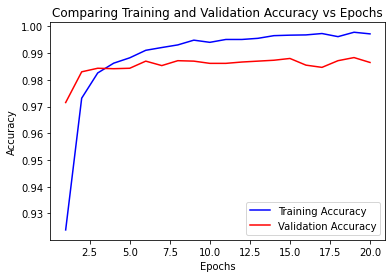

In [ ]:
# extracting the model accuracy against epochs
ta = history.history['accuracy']
va = history.history['val_accuracy']
epochs = range(1,21)

# plotting the accuracies
plt.figure()
plt.plot(epochs, ta, 'b', label='Training Accuracy')
plt.plot(epochs, va, 'r', label='Validation Accuracy')
plt.title('Comparing Training and Validation Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

As we can see, there training accuracy increases and then plateaus, whereas the validation accuracy is more or less constant. There is not much difference between the training and validation accuracies.

Next, we compare the training and validation losses. To do this, we use the history attribute and extract the losses of the models. Next, we plot it against the number of epochs using functions from the MatPlotLib library.

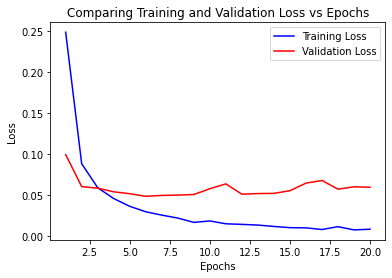

In [ ]:
# extracting the model loss against epochs
tl = history.history['loss']
vl = history.history['val_loss']
epochs = range(1,21)

# plotting the losses
plt.figure()
plt.plot(epochs, tl, 'b', label='Training Loss')
plt.plot(epochs, vl, 'r', label='Validation Loss')
plt.title('Comparing Training and Validation Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

As we can see, there training loss decreases and then plateaus, whereas the validation loss is more or less constant. There is not much difference between the training and validation losses.

To evaluate the performance of the model on the test set, we use the evaluate() function and print the model's accuracy on the testing set.

In [ ]:
# evaluating the model on the testing set
print(str.format('Accuracy on Test Set: {:.2f}%', model.evaluate(x_test, y_test)[1]*100))

313/313 [==============================] - 1s 4ms/step - loss: 0.0518 - accuracy: 0.9874
Accuracy on Test Set: 98.74%


As we can see, the model performs very well since is has an accuracy of 98.74%.

Next, we use visual aids for model evaluation. To do that, we first obtain the prediction of the network using predict() function on the testing set. We also use the argmax() function from the NumPy library to predict the classes from the probabilities.

In [ ]:
# obtaining the predictions
pred = np.argmax(model.predict(x_test), axis=1)

After that, print out the classification_report() for a detailed analysis using functions from the sklearn library.

In [ ]:
# printing the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.98      0.99      0.99      1032
           3       0.97      0.99      0.98      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.98      0.98       892
           6       0.99      0.99      0.99       958
           7       0.99      0.98      0.99      1028
           8       0.98      0.99      0.99       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



As we can see, the metrics range between 0.97-1.00, which means that the model performs very well.

Now, we plot a confusion matrix using the confusion_matrix() function from the sklearn library and the heatmap() function from the Seaborn library. 

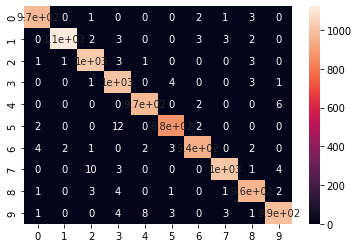

In [ ]:
# plotting the confusion matrix
from sklearn.metrics import confusion_matrix 
sns.heatmap(confusion_matrix(y_test, pred), annot=True)

As we can see, there are very less values that are not on the diagonal. This indicates that the model makes very less misclassifications.